<a href="https://colab.research.google.com/github/Osterne/codes_DS_course/blob/main/05_mod_01_ap_sup_regressao_05_mlg_continuos_positivos_normal_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

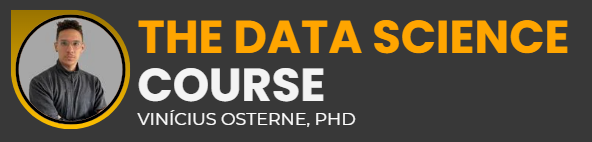

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelos Lineares Generalizados - Modelos para Dados Contínuos Positivos - Regressão Normal Inversa

---
<br><br><br><br><br>

---

## 🚦 Motivação e Contexto

- 🔢 Exemplos de dados contínuos positivos:  
  - 💰 Custos hospitalares  
  - ⏱️ Tempo de resposta de processos químicos  
  - 🚀 Tempo até falha de componentes  
  - ⚡ Consumo de energia  

- ⚠️ Por que não usar Normal (OLS)?  
  - ❌ Normal assume variância constante.  
  - 📈 Em muitos dados reais a variância cresce **ainda mais rápido que na Gama**, seguindo:  
    $$
    \mathrm{Var}(Y) \propto \mu^3
    $$  
  - Isso gera **heterocedasticidade acentuada** e estimativas ineficientes.  

> 💡 **Motivação**: A **distribuição Normal Inversa (Inverse Gaussian)** é adequada quando a variância cresce com o **cubo da média**.

<br><br><br>

---

## 🧩 Estrutura Geral dos Modelos Lineares Generalizados (MLG) para Normal Inversa

Um MLG é definido a partir de **três componentes principais**:

### 🎲 1. Componente Aleatório
- A variável resposta segue a **Normal Inversa**:  
  $$
  Y_i \sim \text{InvGaussian}(\mu_i, \phi)
  $$
- Momentos:  
  $$
  \mathbb{E}[Y_i] = \mu_i, \qquad \text{Var}(Y_i) = \phi \mu_i^3
  $$
  onde $\phi > 0$ é o **parâmetro de dispersão**.  

---

### 📊 2. Componente Sistemático
- Representa a **combinação linear dos preditores**:  
  $$
  \eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}
  $$

---

### 🔗 3. Função de Ligação
- Conecta a média $\mu_i$ ao previsor linear $\eta_i$:  
  $$
  g(\mu_i) = \eta_i
  $$
- Ligações usuais:  

| Ligação        | Fórmula            | Observações |
|----------------|--------------------|-------------|
| 🔑 **1/μ² (canônica)** | $g(\mu) = 1/\mu^2$ | Garante positividade e propriedades matemáticas. |
| ➡️ **Log** | $g(\mu) = \log(\mu)$ | Muito usada na prática; interpretação multiplicativa. |
| ➡️ **Identidade** | $g(\mu) = \mu$ | Interpretação direta, mas risco de prever valores não positivos. |

---

✅ **Resumo para a Regressão Normal Inversa**  
- **Aleatório**: $Y_i \sim \text{InvGaussian}(\mu_i, \phi)$  
- **Sistemático**: $\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}$  
- **Ligação típica**: $\log(\mu_i) = \eta_i$ ou $1/\mu_i^2 = \eta_i$  

<br><br><br>

---

## ⚠️ Limitações da Normal Inversa

- Pode ser **instável em amostras pequenas** (estimação de φ difícil).  
- Dados com **assimetria leve/moderada** podem ser melhor ajustados por Gama.  
- Não lida com **zeros estruturais** (Tweedie pode ser mais adequado).  
- Pouco intuitiva para interpretação direta (coeficientes exigem mais cuidado).  

<br><br><br>

---

## 🔍 Comparações e Critérios de Escolha

- **Diagnóstico de dispersão**:  
  - 📊 Resíduos de Pearson / GL ≈ 1 → ajuste adequado.  
  - 📊 Deviance / GL também deve estar próximo de 1.  

- **Critérios de informação (AIC, BIC)**:  
  - Comparar entre Gama, Normal Inversa e outras alternativas.  

- **Regras práticas**:  
  - ✔️ **Normal (OLS)**: variância ≈ constante.  
  - ✔️ **Gama**: variância ∝ μ².  
  - ✔️ **Normal Inversa**: variância ∝ μ³.  
  - ✔️ **Tweedie**: mistura de zeros + contínuos positivos.  

---

## 📌 Comentário em relação à Regressão Gama
- Tanto **Gama** quanto **Normal Inversa** são adequados para dados contínuos positivos e assimétricos.  
- A escolha depende da **relação entre a variância e a média**:  
  - **Gama** → quando $\text{Var}(Y) \propto \mu^2$.  
  - **Normal Inversa** → quando $\text{Var}(Y) \propto \mu^3$.  
- Na prática, vale ajustar os dois e comparar via **AIC/BIC e resíduos**.  
- Muitas vezes a **Gama** é o ponto de partida, e a **Normal Inversa** é testada quando a dispersão residual ainda é grande ou há caudas mais pesadas.  

<br><br><br>

---

## 🔍 Aplicação (em Python)

- Pacotes necessários  
- Carregamento dos dados  
- Estatística Descritiva  
- Ajuste do Modelo (GLM InvGaussian)  
- Interpretação dos resultados  
- Diagnóstico do ajuste  



### Aplicação

In [ ]:
# ----------------------------------------------------
# 1. Pacotes necessários
# ----------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustes visuais
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

In [ ]:
# ----------------------------------------------------
# 2. Carregamento dos dados (Engel)
# ----------------------------------------------------
engel = sm.datasets.engel.load_pandas().data.rename(columns=str.lower)
engel = engel[(engel["foodexp"] > 0) & (engel["income"] > 0)].copy()

print("Amostra (5 primeiras linhas):")
print(engel.head(), "\n")

Amostra (5 primeiras linhas):
       income     foodexp
0  420.157651  255.839425
1  541.411707  310.958667
2  901.157457  485.680014
3  639.080229  402.997356
4  750.875606  495.560775 



In [ ]:
# ----------------------------------------------------
# 3. Estatística Descritiva
# ----------------------------------------------------
print("Resumo estatístico:")
print(engel[["foodexp","income"]].describe(), "\n")

Resumo estatístico:
           foodexp       income
count   235.000000   235.000000
mean    624.150111   982.473044
std     276.456997   519.230879
min     242.320202   377.058369
25%     429.688763   638.875788
50%     582.541251   883.984917
75%     743.881432  1163.986672
max    2032.679190  4957.813024 



In [ ]:
mu_food = engel["foodexp"].mean()
var_food = engel["foodexp"].var()
print(f"Média(foodexp) = {mu_food:.2f} | Var(foodexp) = {var_food:.2f} | Var/mu^3 = {var_food/(mu_food**3):.6f}\n")

Média(foodexp) = 624.15 | Var(foodexp) = 76428.47 | Var/mu^3 = 0.000314



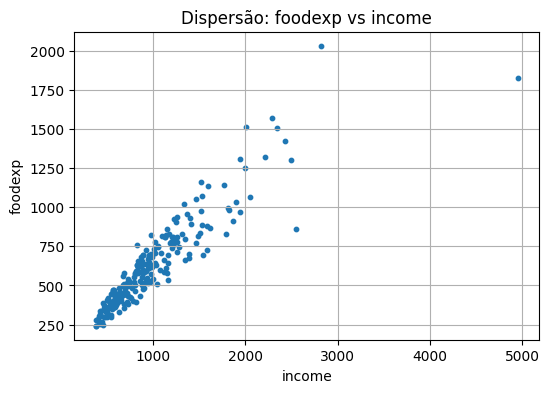

In [ ]:
plt.figure()
plt.scatter(engel["income"], engel["foodexp"], s=10)
plt.xlabel("income")
plt.ylabel("foodexp")
plt.title("Dispersão: foodexp vs income")
plt.show()

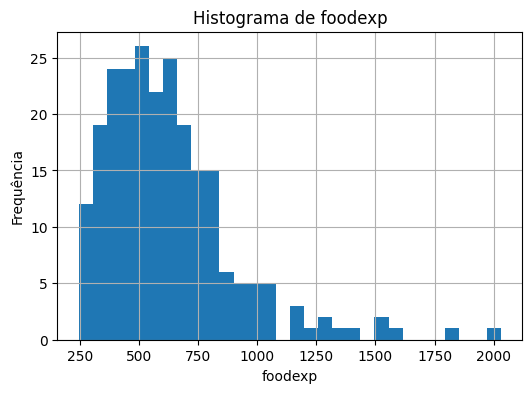

In [ ]:
plt.figure()
plt.hist(engel["foodexp"], bins=30)
plt.xlabel("foodexp")
plt.ylabel("Frequência")
plt.title("Histograma de foodexp")
plt.show()

In [ ]:
# ----------------------------------------------------
# 4. Ajuste do Modelo (GLM InvGaussian com link log)
# ----------------------------------------------------
familia = sm.families.InverseGaussian(link=sm.families.links.log())
modelo_ig = smf.glm("foodexp ~ income", data=engel, family=familia).fit()

print(modelo_ig.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                foodexp   No. Observations:                  235
Model:                            GLM   Df Residuals:                      233
Model Family:         InverseGaussian   Df Model:                            1
Link Function:                    log   Scale:                      4.3616e-05
Method:                          IRLS   Log-Likelihood:                -1410.4
Date:                Sun, 31 Aug 2025   Deviance:                     0.011744
Time:                        19:02:35   Pearson chi2:                   0.0102
No. Iterations:                    22   Pseudo R-squ. (CS):             0.9946
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4537      0.026    207.749      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
# ----------------------------------------------------
# 5. Interpretação dos resultados
# ----------------------------------------------------
params = modelo_ig.params
conf = modelo_ig.conf_int()
ratios = np.exp(params)
ratios_ci = np.exp(conf)

interpret = pd.DataFrame({
    "coef": params,
    "exp(coef)": ratios,
    "2.5% exp(coef)": ratios_ci[0],
    "97.5% exp(coef)": ratios_ci[1]
})
print("\nInterpretação multiplicativa (exp(coef)):")
print(interpret, "\n")


Interpretação multiplicativa (exp(coef)):
               coef   exp(coef)  2.5% exp(coef)  97.5% exp(coef)
Intercept  5.453686  233.617764      221.901759       245.952352
income     0.000955    1.000955        1.000897         1.001013 



# 📌 Interpretação dos Coeficientes – Regressão Normal Inversa

## 🔹 Resultado
| Variável   | Coef (β)  | exp(coef) | IC 95% exp(coef)       |
|------------|-----------|-----------|------------------------|
| Intercept  | 5.454     | 233.62    | [221.90 ; 245.95]      |
| income     | 0.000955  | 1.000955  | [1.000897 ; 1.001013]  |

---

## 🔎 Como interpretar
- **Intercepto (β₀ = 5.454, exp(β₀) ≈ 233,6)**  
  - Representa o gasto esperado em `foodexp` quando `income = 0`.  
  - Valor de referência matemática, sem interpretação prática direta (renda zero não é observável).  

- **Income (β₁ = 0.000955, exp(β₁) ≈ 1.000955)**  
  - A cada aumento de **1 unidade em income**, o gasto esperado com alimentação (`foodexp`) **multiplica-se por 1.000955**.  
  - Em termos percentuais:  
$$
(1.000955 - 1) \times 100 \approx 0.0955\%
$$
  - Ou seja, cada **+1 unidade de income aumenta `foodexp` em ~0.096%**.  

---

## ✅ Resumo
- O modelo mostra que **maior renda leva a maior gasto com alimentação**.  
- O efeito marginal por unidade de renda é pequeno, mas **se acumula** para valores grandes de `income`.  
- O intervalo de confiança é muito estreito → coeficiente altamente significativo.


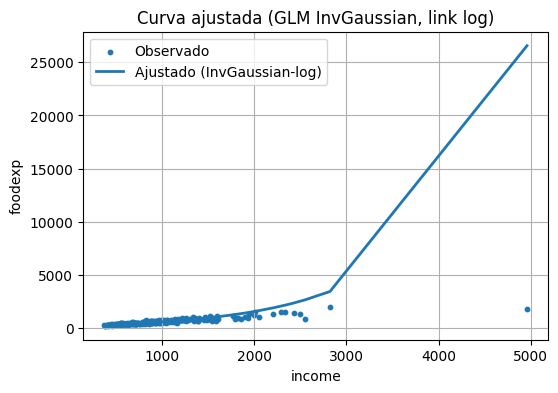

In [ ]:
engel_sorted = engel.sort_values("income").copy()
engel_sorted["fit_mu"] = modelo_ig.predict(engel_sorted)

plt.figure()
plt.scatter(engel["income"], engel["foodexp"], s=10, label="Observado")
plt.plot(engel_sorted["income"], engel_sorted["fit_mu"], linewidth=2, label="Ajustado (InvGaussian-log)")
plt.xlabel("income")
plt.ylabel("foodexp")
plt.title("Curva ajustada (GLM InvGaussian, link log)")
plt.legend()
plt.show()

In [ ]:
# ----------------------------------------------------
# 6. Diagnóstico do ajuste
# ----------------------------------------------------
pearson_chi2 = modelo_ig.pearson_chi2
df_resid = modelo_ig.df_resid
deviance = modelo_ig.deviance
print(f"Pearson/GL = {pearson_chi2/df_resid:.3f}  |  Deviance/GL = {deviance/df_resid:.3f}\n")

Pearson/GL = 0.000  |  Deviance/GL = 0.000



# 📌 Diagnóstico – Regressão Normal Inversa

- **Pearson/GL = 0.000 | Deviance/GL = 0.000**
- Isso indica **subdispersão extrema**: os resíduos são praticamente nulos.
- O modelo **Inverse Gaussian** ajustou os dados quase perfeitamente.
- Pode refletir:
  - Relação muito bem explicada entre `foodexp` e `income`.
  - Propriedade da família Normal Inversa (absorve bem a variação).
  - Possível **superajuste** (overfitting).

## ✅ Resumo
O modelo ajusta tão bem que sobra quase nenhuma variabilidade nos resíduos.  
Antes de concluir, compare sempre com **Gama** via **AIC/BIC** e verifique gráficos de resíduos.


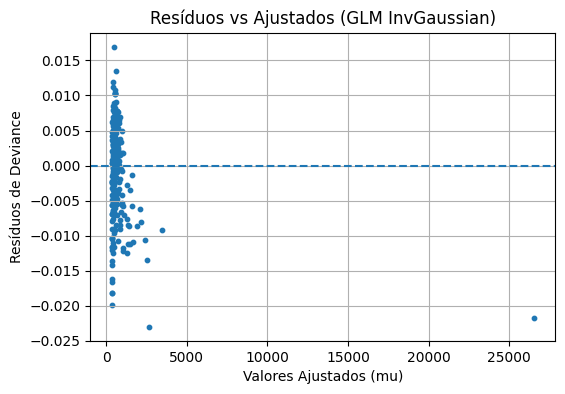

In [ ]:
resid_dev = modelo_ig.resid_deviance.copy()
fitted = modelo_ig.fittedvalues.copy()

plt.figure()
plt.scatter(fitted, resid_dev, s=10)
plt.axhline(0, linestyle="--")
plt.xlabel("Valores Ajustados (mu)")
plt.ylabel("Resíduos de Deviance")
plt.title("Resíduos vs Ajustados (GLM InvGaussian)")
plt.show()

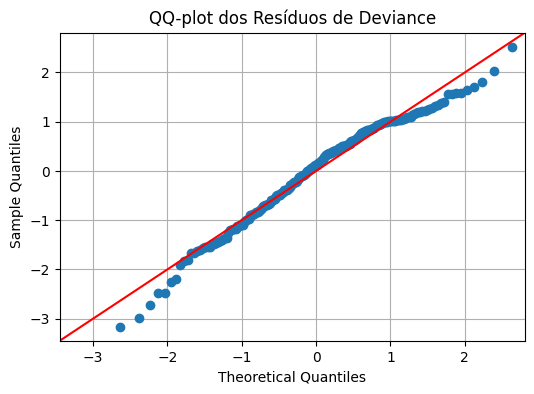

In [ ]:

sm.qqplot(resid_dev, line="45", fit=True)
plt.title("QQ-plot dos Resíduos de Deviance")
plt.show()